In [1]:
import returns as rt
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
tickers = ['AMZN','CVX','CCL','AAL']
date_from = '2020-01-02'
df = None

for i in tickers:
    df_t = rt.returns(i,'Daily')
    
    # volatility   
    df_t['volatility_30'] = df_t['Return'].rolling(window=30).std()
    
    # RSI
    df_t.loc[df_t.Delta > 0, 'up'] = df_t.Delta
    df_t.loc[df_t.Delta < 0, 'down'] = df_t.Delta
    df_t.fillna({'up':0,'down':0},inplace=True)
    df_t['RSI'] = 100 - (100 / (1 + df_t['up'].rolling(window=14).mean() / df_t['down'].rolling(window=14).mean().abs()))
    
    # indexed performance
    df_t = df_t[df_t.index >= date_from]
    df_t['performance'] = ((df_t.Return / 100) + 1).cumprod() * 100
    
    if df is None:
        df = df_t
    else:
        df = pd.concat([df,df_t])

df.set_index(['Ticker'],append=True,inplace=True)
        
df.head()

,,ReturnPeriod,Close,Dividends,DeltaPrice,Delta,Return,volatility_30,up,down,RSI,performance
Date,Ticker,,,,,,,,,,,
2020-01-02,AMZN,Daily,1898.01,0.0,50.17,50.17,2.715062,1.189662,50.17,0.00,82.809547,102.715062
2020-01-03,AMZN,Daily,1874.97,0.0,-23.04,-23.04,-1.213903,1.219628,0.00,-23.04,73.989286,101.468201
2020-01-06,AMZN,Daily,1902.88,0.0,27.91,27.91,1.488557,1.234254,27.91,0.00,76.656400,102.978613
2020-01-07,AMZN,Daily,1906.86,0.0,3.98,3.98,0.209157,1.222278,3.98,0.00,76.274098,103.193999
2020-01-08,AMZN,Daily,1891.97,0.0,-14.89,-14.89,-0.780865,1.237065,0.00,-14.89,69.834371,102.388194


# Return Indexed to 100

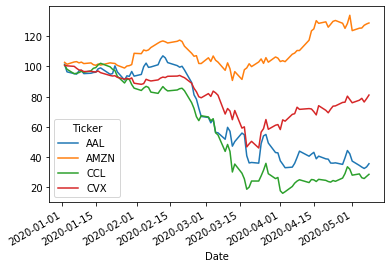

In [91]:
df_p = df.pivot_table(index='Date',columns='Ticker',values='performance')

df_p.plot(sharey=True)

# Volatility (30 day window)

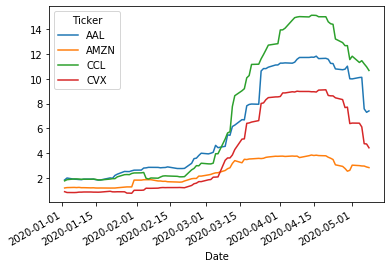

In [92]:
df_p = df.pivot_table(index='Date',columns='Ticker',values='volatility_30')

df_p.plot(sharey=True)

# RSI

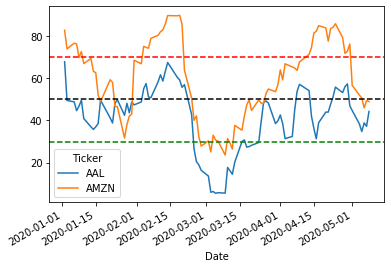

In [93]:
df_r = df.loc[(slice(None), ['AMZN','AAL']), :]

df_r = df_r.pivot_table(index='Date',columns='Ticker',values='RSI')

df_r.plot(sharey=True)

plt.axhline(y=50, xmin=0.0, xmax=1.0, color='k',ls='--')
plt.axhline(y=30, xmin=0.0, xmax=1.0, color='g',ls='--')
plt.axhline(y=70, xmin=0.0, xmax=1.0, color='r',ls='--')

# Price v. 30 Day Moving Average

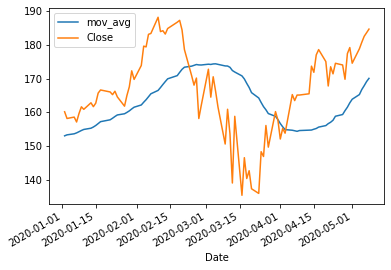

In [95]:
df_n = rt.returns('MSFT','Daily')

df_n['mov_avg'] = df_n['Close'].rolling(window=30).mean()

df_n = df_n[df_n.index >= '2020-01-01']

df_n[['mov_avg','Close']].plot()